# Project: Analysis of Iris Species Data

## Analysis Objective

The purpose of this data analysis report is to examine, based on the attribute data of iris flowers, whether there are statistically significant differences in the mean values of sepal length, sepal width, petal length, and petal width between two iris species. This will allow us to make inferences about the attribute characteristics of different iris species.

## Introduction

The original dataset `Iris.csv` includes two species of iris, with 50 samples for each species. Each sample contains several attributes: sepal length, sepal width, petal length, and petal width.

The meaning of each column in `Iris.csv` is as follows:
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data.

In [2]:
ori_data = pd.read_csv("E:\\Python\\e_analyze_data\\Iris.csv")
ori_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Evaluate and clean data.

## 1. Evaluate data tidiness.

In [3]:
ori_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Looking at a sample of 10 rows, the data conform to NF-3.Slecifically,  
row: 某一个iris的各种数据。  
columns： 每个具体的数据。  
Therefore, there are no structural issues.

## 2. Evaluate data cleanliness.

### Opening with a little pawn.

In [4]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


From the output, there are a total of 100 observations.  
No missing data.  
`Species` should be category.  
We need to convert its types.  

Create copy.

In [5]:
clean_data = ori_data.copy()

In [6]:
clean_data['Species'] = clean_data['Species'].astype('category')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    int64   
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 4.2 KB


### Pawn out.

### 1Evaluate missing data.etc

### 2Evaluate duplicated data.etc

### 3Evaluate inconsistent data.

Inconsistent data might be in the `Species`. We need to check if there are multiple different values referring to the same variable. 

In [7]:
clean_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

From the output, there are no inconsistent data.No need to standardize them.

### 4Evaluate invalid or incorrect data.

In [8]:
clean_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.471000,3.094000,2.862000,0.785000
std,29.011492,0.641698,0.476057,1.448565,0.566288
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,25.750000,5.000000,2.800000,1.500000,0.200000
50%,50.500000,5.400000,3.050000,2.450000,0.800000
75%,75.250000,5.900000,3.400000,4.325000,1.300000
max,100.000000,7.000000,4.400000,5.100000,1.800000


Baesd on the stats above, there are no unrealistic values in the `clean_data`.

In [9]:
clean_data = clean_data.drop('Id', axis=1)

# Orgnize data.

>The purpose of this data analysis is to examine, based on the attribute data of iris flowers, whether there are statistically significant differences in the mean values of sepal length, sepal width, petal length, and petal width between two iris species.

Based on the species column, filter the data into groups for each iris type.

In [10]:
iris_setosa = clean_data.query('Species == "Iris-setosa"')
iris_setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_versicolor = clean_data.query('Species == "Iris-versicolor"')
iris_versicolor.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


# Explore data.

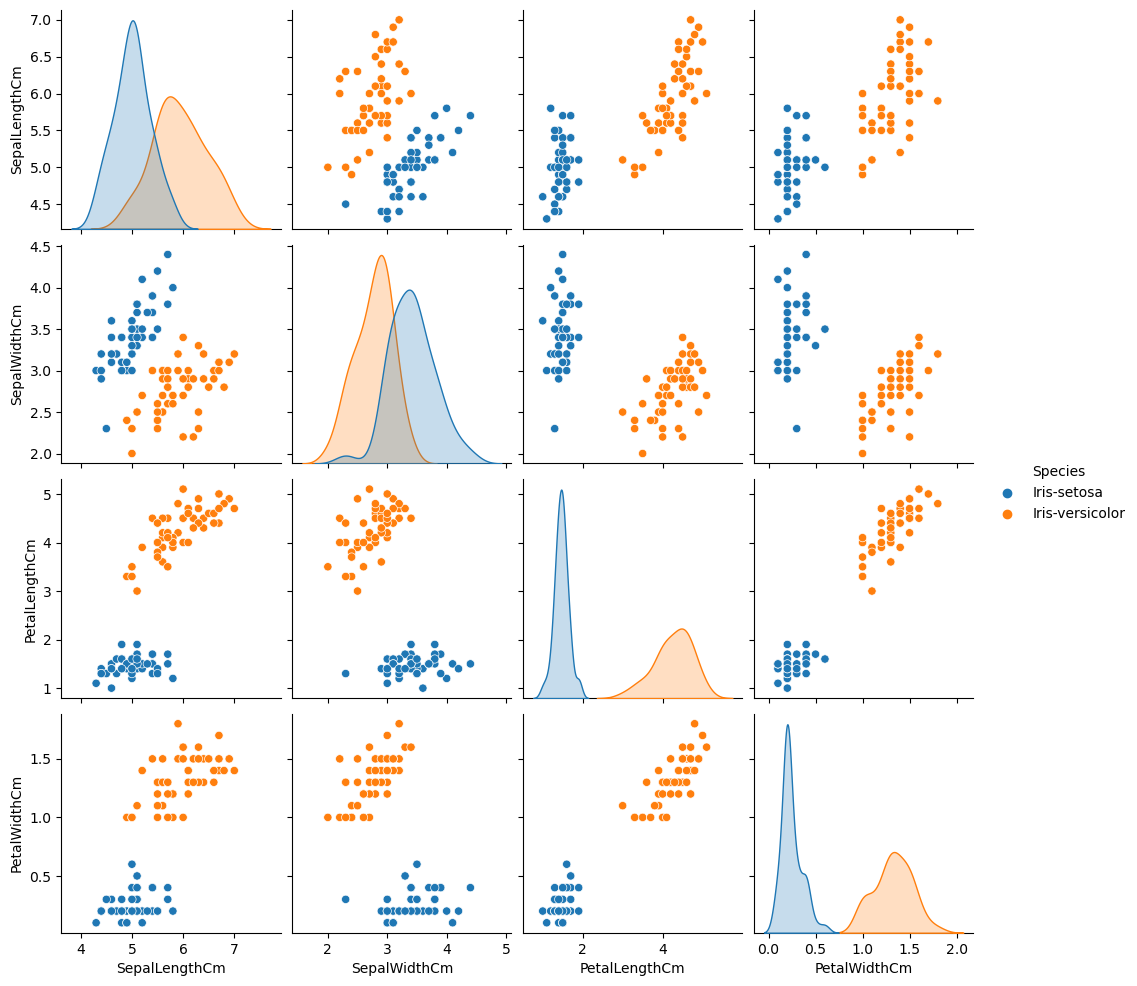

In [12]:
sns.pairplot(data=clean_data, hue='Species')
plt.show()

Based on the above, the Petal_length and Petal_width distributions of Setosa and Versicolor samples show clear numerical differences.We can therefore reasonably expect the hypothesis test to show statistically significant differences in both Petal_length and Petal_width between the two iris species.

# Analyze data.

Use hypothesis testing to examine whether there are statistically significant differences in the average of those varials between the Stosa and Versicolor irie species.  
Don't know variance, so use **t_test**.

In [13]:
from scipy.stats import ttest_ind

## Analyze *Sepal_length*

Sepal_length distribution.

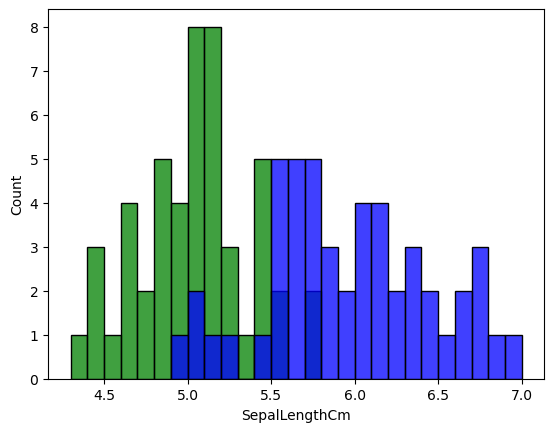

In [14]:
sns.histplot(data=iris_setosa['SepalLengthCm'], binwidth=0.1, color='green')
sns.histplot(data=iris_versicolor['SepalLengthCm'], binwidth=0.1, color='blue')
plt.show()

## King's move.

### Set up the hypotheses.

$H_0$: Setosa and versicolor sepal_length don't have significant difference.  
$H_1$: Setosa and versicolor sepal_length have significant difference.

### Choose whether to use a one-tailed or two-tailed test.

Based on the analyze target, we choose to use the two-tailed test.

### Set the significant level(alpha).

Set the significant level alpha = 0.05

### Calculate the t-statistic and p-value.

In [15]:
t_stat, p_value = ttest_ind(iris_setosa['SepalLengthCm'], iris_versicolor['SepalLengthCm'])
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

t-statistic: -10.52098626754911
p-value: 8.985235037487079e-18


### Conclusion.

In [16]:
alpha = 0.05
if p_value < alpha:
    print('Setosa and versicolor sepal_length have significant difference.')
else:
    print('Setosa and versicolor sepal_length have no significant difference.')

Setosa and versicolor seoal_length have significant difference.


## Analyze Sepal_width.

Sepal_width distribution.

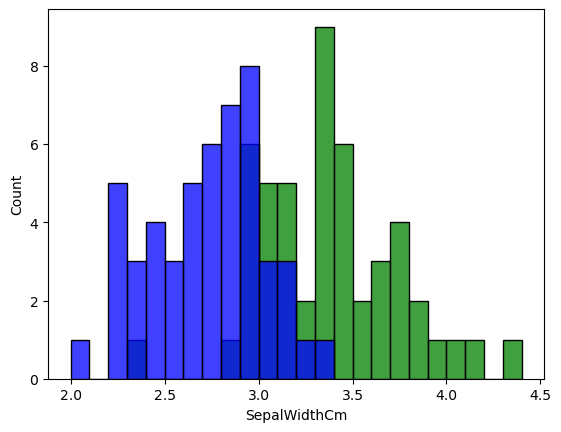

In [22]:
sns.histplot(data=iris_setosa['SepalWidthCm'], binwidth=0.1, color='green')
sns.histplot(data=iris_versicolor['SepalWidthCm'], binwidth=0.1, color='blue')
plt.show()

### Set up the hypotheses.

$H_0$: Setosa and versicolor sepal_width don't have significant difference.  
$H_1$: Setosa and versicolor sepal_width have significant difference.

### Calculate the t-statistic and p-value.

In [20]:
t_stat, p_value = ttest_ind(iris_setosa['SepalWidthCm'], iris_versicolor['SepalWidthCm'])
print(f't-stats = {t_stat}')
print(f'p-value = {p_value}')

t-stats = 9.282772555558111
p-value = 4.362239016010214e-15


### Conclusion.

In [21]:
alpha = 0.05
if p_value < alpha:
    print('Setosa and versicolor sepal_width have significant difference.')
else:
    print('Setosa and versicolor sepal_width have no significant difference.')

Setosa and versicolor sepal_width have significant difference.


## Analyze Petal_length.

Petal_length distribution.

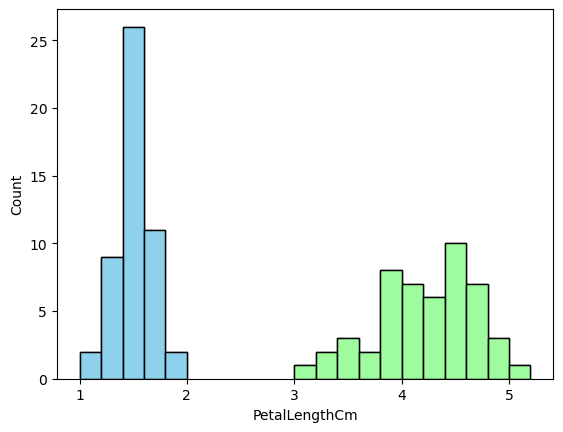

In [26]:
sns.histplot(data=iris_setosa['PetalLengthCm'], binwidth=0.2, color='skyblue')
sns.histplot(data=iris_versicolor['PetalLengthCm'], binwidth=0.2, color='palegreen')
plt.show()

### Set up the hypotheses.

$H_0$: Setosa and versicolor petal_length don't have significant difference.  
$H_1$: Setosa and versicolor petal_length have significant difference.

### Calculate the t-statistic and p-value.

In [28]:
s_stat, p_value = ttest_ind(iris_setosa['PetalLengthCm'], iris_versicolor['PetalLengthCm'])
print(f't-stats = {t_stat}')
print(f'p-value = {p_value}')

t-stats = 9.282772555558111
p-value = 5.717463758170621e-62


### Conclusion.

In [29]:
alpha = 0.05
if p_value < alpha:
    print('Setosa and versicolor petal_length have significant difference.')
else:
    print('Setosa and versicolor petal_length have no significant difference.')

Setosa and versicolor petal_length have significant difference.


## Analyze Petal_width.

Petal_width distribution.

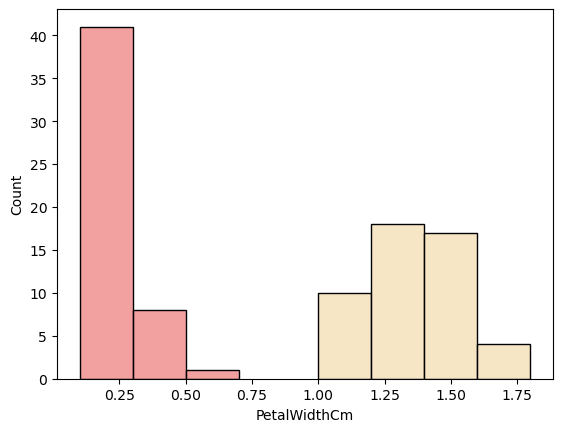

In [31]:
sns.histplot(data=iris_setosa['PetalWidthCm'], binwidth=0.2, color='lightcoral')
sns.histplot(data=iris_versicolor['PetalWidthCm'], binwidth=0.2, color='wheat')
plt.show()

### Set up the hypotheses.

$H_0$: Setosa and versicolor petal_width don't have significant difference.  
$H_1$: Setosa and versicolor petal_width have significant difference.

### Calculate the t-statistic and p-value.

In [32]:
s_stat, p_value = ttest_ind(iris_setosa['PetalWidthCm'], iris_versicolor['PetalWidthCm'])
print(f't-stats = {t_stat}')
print(f'p-value = {p_value}')

t-stats = 9.282772555558111
p-value = 4.589080615710866e-56


### Conclusion.

In [33]:
alpha = 0.05
if p_value < alpha:
    print('Setosa and versicolor petal_width have significant difference.')
else:
    print('Setosa and versicolor petal_width have no significant difference.')

Setosa and versicolor petal_width have significant difference.


# Bottom line.

Through inferential statistics, we found that the average of SepalLength, SepalWidth, PetalLength, PetalWidth between Setosa and Versicolor show statistically significant differences.

# Checkmate.